# U.S. Airline Traffic Data project
The aim of this project is to predict total flight numbers. The dataset that will be used is composed of U.S. monthly airline traffic from 2003 to 2023, including number of passengers, number of flights, revenue passenger-miles (RPM), available seat-miles (ASM) and load factor. It was taken from Kaggle: https://www.kaggle.com/datasets/yyxian/u-s-airline-traffic-data.

# Part 1 : The dataset features

1. Year (from 2003 to 2023)
2. Month (from 1 to 12)
3. Dom_Pax (Domestic Air Travel Passengers)
4. Int_Pax (International Air Travel Passengers)
5. Pax (Total Air Travel Passengers)
6. Dom_Flt (Number of Flights (Domestic))
7. Int_Flt (Number of Flights (International))
8. Flt (Number of Flights (Total))
9. Dom_RPM (Revenue Passenger-miles (Domestic))
10. Int_RPM (Revenue Passenger-miles (International))
11. RPM (Revenue Passenger-miles (Total))
12. Dom_ASM (Available Seat-miles (Domestic))
13. Int_ASM (Available Seat-miles (International))
14. ASM (Available Seat-miles (Total))
15. Dom_LF (Load Factor (Domestic))
16. Int_LF (Load Factor (International))
17. LF (Load Factor (Total))

Notes:
Revenue Passenger-miles = the number of passengers and the distance flown in thousands (000)
Available Seat-miles = the number of seats and the distance flown in thousands (000)
Load Factor = passenger-miles as a proportion of available seat-miles in percent (%)

# Part 2 : Exploratory Data Analysis (EDA)

In [1]:
# Importing all the necessary tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

C:\Users\user\AppData\Local\Temp\ipykernel_14600\4171662978.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Creating a DataFrame
data = pd.read_csv("air traffic.csv")
data

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,"43,032,450","4,905,830","47,938,280","785,160","57,667","842,827","36,211,422","12,885,980","49,097,402","56,191,300","17,968,572","74,159,872",64.44,71.71,66.20
1,2003,2,"41,166,780","4,245,366","45,412,146","690,351","51,259","741,610","34,148,439","10,715,468","44,863,907","50,088,434","15,587,880","65,676,314",68.18,68.74,68.31
2,2003,3,"49,992,700","5,008,613","55,001,313","797,194","58,926","856,120","41,774,564","12,567,068","54,341,633","57,592,901","17,753,174","75,346,075",72.53,70.79,72.12
3,2003,4,"47,033,260","4,345,444","51,378,704","766,260","55,005","821,265","39,465,980","10,370,592","49,836,572","54,639,679","15,528,761","70,168,440",72.23,66.78,71.02
4,2003,5,"49,152,352","4,610,834","53,763,186","789,397","55,265","844,662","41,001,934","11,575,026","52,576,960","55,349,897","15,629,821","70,979,718",74.08,74.06,74.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023,5,"71,423,653","10,358,666","81,782,319","667,331","71,924","739,255","66,743,565","26,805,432","93,548,998","77,821,407","31,950,687","109,772,094",85.77,83.90,85.22
245,2023,6,"72,482,621","11,544,505","84,027,126","661,293","75,279","736,572","68,789,127","29,883,465","98,672,591","78,058,358","33,410,671","111,469,028",88.13,89.44,88.52
246,2023,7,"75,378,157","12,432,615","87,810,772","684,939","79,738","764,677","72,267,904","31,376,000","103,643,904","81,986,010","35,326,191","117,312,202",88.15,88.82,88.35
247,2023,8,"71,477,988","11,572,149","83,050,137","691,482","77,137","768,619","67,933,484","29,938,507","97,871,992","81,997,399","34,908,793","116,906,192",82.85,85.76,83.72


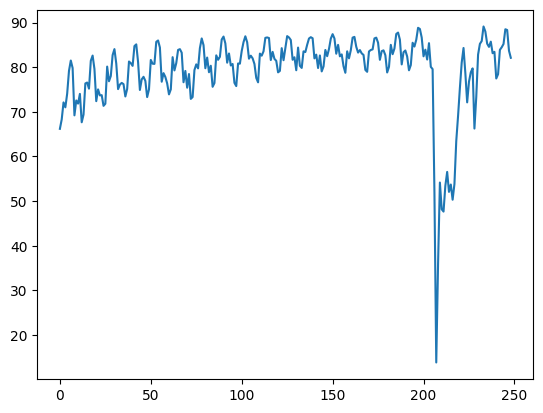

In [3]:
# Demonstration of a load factor graph
data.LF.plot();

In [4]:
data.describe()

,Year,Month,Dom_LF,Int_LF,LF
count,249.000000,249.000000,249.000000,249.000000,249.000000
mean,2012.879518,6.445783,79.938394,77.304940,79.286305
std,6.002817,3.442803,8.860562,10.907145,8.895700
min,2003.000000,1.000000,13.090000,23.150000,13.830000
25%,2008.000000,3.000000,77.720000,76.430000,76.940000
50%,2013.000000,6.000000,82.120000,79.910000,81.580000
75%,2018.000000,9.000000,85.240000,82.930000,84.070000
max,2023.000000,12.000000,89.960000,89.440000,89.140000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    object 
 3   Int_Pax  249 non-null    object 
 4   Pax      249 non-null    object 
 5   Dom_Flt  249 non-null    object 
 6   Int_Flt  249 non-null    object 
 7   Flt      249 non-null    object 
 8   Dom_RPM  249 non-null    object 
 9   Int_RPM  249 non-null    object 
 10  RPM      249 non-null    object 
 11  Dom_ASM  249 non-null    object 
 12  Int_ASM  249 non-null    object 
 13  ASM      249 non-null    object 
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(2), object(12)
memory usage: 33.2+ KB


In [6]:
# Checking for missing values
data.isnull().sum()

Year       0
Month      0
Dom_Pax    0
Int_Pax    0
Pax        0
Dom_Flt    0
Int_Flt    0
Flt        0
Dom_RPM    0
Int_RPM    0
RPM        0
Dom_ASM    0
Int_ASM    0
ASM        0
Dom_LF     0
Int_LF     0
LF         0
dtype: int64

The dataset has no missing values, which is good. But, in order for the data to be ready for the modelling process, it needs to be numeric, preferably of the integer type. Many columns being of the object type means that some preprocessing needs to be done for them to be usable.

# 3. Data preprocessing

In [7]:
# Checking
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    object 
 3   Int_Pax  249 non-null    object 
 4   Pax      249 non-null    object 
 5   Dom_Flt  249 non-null    object 
 6   Int_Flt  249 non-null    object 
 7   Flt      249 non-null    object 
 8   Dom_RPM  249 non-null    object 
 9   Int_RPM  249 non-null    object 
 10  RPM      249 non-null    object 
 11  Dom_ASM  249 non-null    object 
 12  Int_ASM  249 non-null    object 
 13  ASM      249 non-null    object 
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(2), object(12)
memory usage: 33.2+ KB


In [8]:
# Converting objects into int64
for column in data.columns:
    if data[column].dtype == "object":
        data[column] = data[column].astype(str)
        data[column] = data[column].str.replace(',', '')
        data[column] = data[column].astype("int64")

In [9]:
# Checking
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    int64  
 3   Int_Pax  249 non-null    int64  
 4   Pax      249 non-null    int64  
 5   Dom_Flt  249 non-null    int64  
 6   Int_Flt  249 non-null    int64  
 7   Flt      249 non-null    int64  
 8   Dom_RPM  249 non-null    int64  
 9   Int_RPM  249 non-null    int64  
 10  RPM      249 non-null    int64  
 11  Dom_ASM  249 non-null    int64  
 12  Int_ASM  249 non-null    int64  
 13  ASM      249 non-null    int64  
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(14)
memory usage: 33.2 KB


Since all the data now is in a format every model can be trained and tested on, the next step is to create models.

# 4. Modelling
For reference: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [10]:
# Creating the target column
X = data.drop("Flt", axis = 1)
y = data.Flt

In [11]:
# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Checking the shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((199, 16), (50, 16), (199,), (50,))

Perfectly aligned.

In [13]:
# Importing the regression model
from sklearn.ensemble import RandomForestRegressor

In [14]:
# Creating the model
model = RandomForestRegressor(n_jobs = -1, 
                              random_state = 42)

In [15]:
# Fitting the data
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [16]:
# Scoring
model.score(X_test, y_test)

0.9974407586337748

It seems that RandomForestRegressor is quite accurate, but that may be misleading. Let's try some other models.

In [17]:
# Ridge
from sklearn.linear_model import Ridge
model_2 = Ridge(alpha = 1.0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9974407586337748

In [18]:
# SVR
from sklearn.svm import SVR
model_3 = SVR(kernel = "linear")
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9974407586337748

All three models have the same score, which means that they are equally accurate. The next step is hyperparameter tuning.

# 5. Hyperparameter tuning

This will focus mostly on optimizing RandomForestRegressor, since all the models behaved the same. RandomizedSearchCV and GridSearchCV will be used for tuning.

In [19]:
from sklearn.model_selection import RandomizedSearchCV
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(2, 20, 2),
           "max_features": [0.5, 1, "sqrt", "sqrt"]}
# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                                    random_state = 42),
                             param_distributions = rf_grid,
                             n_iter = 5,
                             cv = 5,
                             verbose = True)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'sqrt'],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [20]:
# Finding the best parameters
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 5}

In [21]:
# Scoring the randomized model
rs_model.score(X_test, y_test)

0.9356923806163502

Slightly lower than the non-tuned model, but nevertheless very accurate. Let's test the ideal model with the best parameters.

In [22]:
ideal_model = RandomForestRegressor(n_estimators = 80, min_samples_split = 8, min_samples_leaf = 10, max_features = 0.5, max_depth = 5)
ideal_model.fit(X_train, y_train)
ideal_model.score(X_test, y_test)

0.9678986127864453

Time for some predictions.

In [23]:
# Standard prediction
data_preds = ideal_model.predict(X_test)
data_preds

array([779213.19153468, 892088.08769218, 696890.91066277, 847609.01708049,
       785284.26170523, 721381.61172869, 816164.07973097, 763432.758127  ,
       865987.61277391, 769033.12231803, 830782.52583079, 461995.73430513,
       808406.40609698, 691878.66949366, 896985.03493289, 694978.80459385,
       696356.57658683, 880449.3071192 , 816092.64130771, 857728.30980535,
       754853.76680988, 909331.59316719, 829353.56634566, 802552.50720553,
       815145.99175655, 892018.17256131, 904641.60036763, 826311.10261776,
       906509.44047514, 729783.71566525, 764184.32916531, 888942.25718614,
       737624.25925331, 743205.71344637, 823373.68731118, 770377.49406398,
       912185.42307966, 773919.10362663, 788094.46289481, 766942.39025098,
       740348.12282129, 744456.1880821 , 741720.60598908, 785416.31664891,
       737077.2532642 , 889087.31798437, 797912.35851092, 839011.08182866,
       772132.12459884, 901654.32607213])

# 6. Feature importances
We will take a look at the features that were the most important in predicting the number of total flights.

In [24]:
# Helper function to plot feature importance
def plot_features(columns, importances, n = 20):
    df = (pd.DataFrame({"Features": columns,
                        "feature_importances": importances})
         .sort_values("feature_importances", ascending = False)
         .reset_index(drop = True))
    # Plot DataFrame
    fig,ax = plt.subplots()
    ax.barh(df["Features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

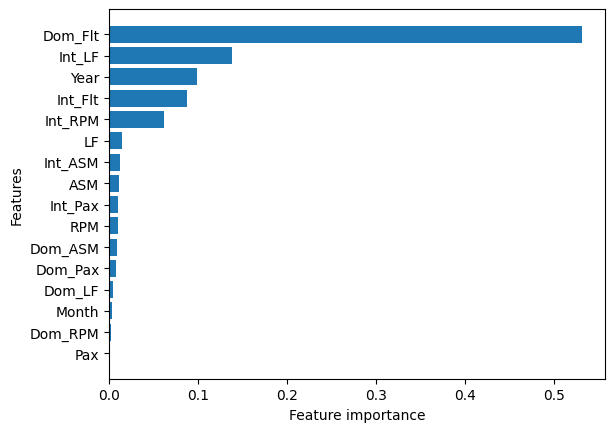

In [25]:
plot_features(X_train.columns, ideal_model.feature_importances_)

For an interpretation, domestic flights have played the biggest role in the total flight numbers by far, then the international load factor.